# 2. Distributions
**In the first chapter, having cleaned and validated your data, you began exploring it by using histograms to visualize distributions. In this chapter, you'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). You'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.**

## Probability mass functions
### GSS
The **General Social Survey**, or **GSS**, has run annually since 1972; it surveys a representative sample of the **adult population in the U.S**. and **asks questions about demographics and beliefs about social and political issues**. It is **widely used by politicians, policy makers, and researchers**.

### Read the data
The GSS contains hundreds of variables. It's been selected just a few and already cleaned and validated, so we just have to read the file, like this. If you run `gss.head()`, you can see the first few rows.

In [1]:
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')

gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


### Histogram
To get started with this dataset, let's look at the distribution of educ, which records the number of years of education for each respondent. First I'll select a column from the DataFrame. We've already seen one way to visualize a distribution, a histogram. Here's the code that generates it, and here's the histogram for this variable. 

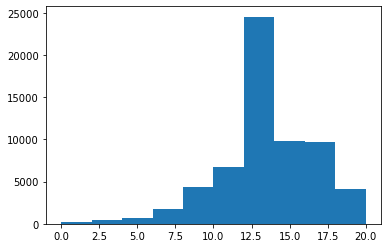

In [2]:
import matplotlib.pyplot as plt
educ= gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.

### PMF
An alternative is a **probability mass function**, or **PMF**, that contains the unique values in the dataset and how often each one appears. It's provided as a class called `Pmf` that computes a probability mass function. This class is based on a Pandas Series and it provides some methods that aren't in Pandas. 

The first argument can be any kind of sequence; in this case, it's a Series object. The second argument indicates that we don't want to normalize this PMF. It'll be explain what that means soon.

<!--
```python
pmf_educ = Pmf(educ, normalize=False)
pmf_educ.head()
```
```
0.0    566
1.0    118
2.0    292
3.0    686
4.0    746
Name: educ, dtype: int64
```
-->

In [3]:
from empiricaldist import Pmf
pmf_educ = Pmf.from_seq(educ, normalize=False)
pmf_educ.head()

,probs
0.0,144
1.0,38
2.0,151


The result is a Series that contains the values on the left and the counts on the right. 

You can use the bracket operator to look up a value in a Pmf and get a count. 
<!--
```python
pmf_educ[12]
```
```
47689
```
-->

In [4]:
pmf_educ[12]

19145

This example shows that there are a lot of respondents with 12 years of education, which is the most frequent value.

### Normalize
Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting `normalize=True`; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1. 
<!--
```python
pmf_educ = Pmf(educ, normalize=True)

pmf_educ.head()
```
```
0.0    0.003663
1.0    0.000764
2.0    0.001890
3.0    0.004440
4.0    0.004828
Name: educ, dtype: int64
```
-->

In [5]:
pmf_educ = Pmf.from_seq(educ, normalize=True)
pmf_educ.head()

,probs
0.0,0.002311
1.0,0.000610
2.0,0.002424


Now if we use the bracket operator, the result is a fraction. 
<!--
```python
pmf_educ[12]
```
```
0.30863869940587907
```
-->

In [6]:
pmf_educ[12]

0.3072836414997432

In this example, the fraction of people with 12 years of education is 0.3073, a little more than 30%.

### Plot
The Pmf class provides a `bar()` method that plots a PMF as a bar chart. And here's what it looks like. 

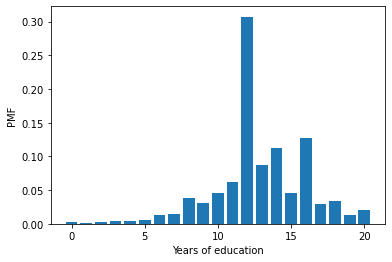

In [7]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

In this figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to two and four years of college.

### Histogram vs. PMF
For this data, the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details. In this example, we can't see the peaks at 14 and 16 years.

## Make a PMF
In this exercise, you'll focus on one variable in this dataset, `'year'`, which represents the year each respondent was interviewed.

- Make a PMF for `year` with `normalize=False` and display the result.

In [8]:
# Compute the PMF for year
pmf_year = Pmf.from_seq(gss['year'], normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


## Plot a PMF
Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable `'age'` contains respondents' age in years.
- Select the `'age'` column from the `gss` DataFrame and store the result in `age`.
- Make a normalized PMF of `age`. Store the result in `pmf_age`.
- Plot `pmf_age` as a bar chart.

In [9]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

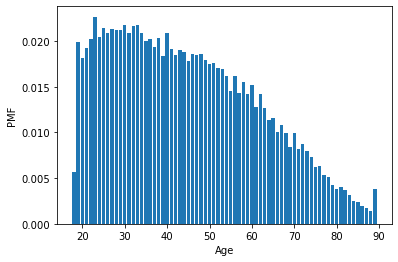

In [10]:
# Plot the PMF
pmf_age.bar(label='pmf_age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

*You could also use* `pmf_age.plot()` *to plot the Pmf as a line plot.*

---

## Cumulative distribution functions
We'll see another way to represent a distribution, the cumulative distribution function, or CDF. CDFs are useful for some computations; they are also a great way to visualize and compare distributions.

### From PMF to CDF
If you draw a random element from a distribution:
- **PMF** (Probability Mass Function) is the probability that you get exactly x
- **CDF** (Cumulative Distribution Function) is the probability that you get a value <= x
for a given value of x.

### Example
```
PMF of {1, 2, 2, 3, 5}
PMF(1) = 1/5
PMF(2) = 2/5
PMF(3) = 1/5
PMF(5) = 1/5

CDF is the cumulative sum of the PMF.
CDF(1) = 1/5
CDF(2) = 3/5
CDF(3) = 4/5
CDF(5) = 1
```
As a small example, suppose the distribution only has 5 elements, 1, 2, 2, 3, and 5. The PMF says that the probability of value 1 is 1/5; the probability of value 2 is 2/5, and the probabilities for 3 and 5 are 1/5. The CDF is the cumulative sum of the probabilities from the PMF. For example, the CDF of 2 is three fifths, because three out of 5 values in the distribution are less than or equal to 2. The CDF of 5 is 1, or 100%, because all of the values in the distribution are less than or equal to 5.

### Make and plot a CDF
As a function, Cdf takes any kind of sequence and returns a new Cdf object. In this example, the sequence is the ages of respondents in the General Social Survey. The Cdf provides plot, which plots the CDF as a line. 

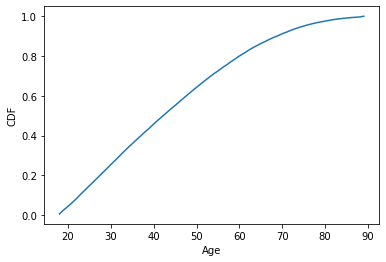

In [11]:
from empiricaldist import Cdf
cdf = Cdf.from_seq(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

Here's what it looks like. The x-axis is the ages, from 18 to 89. The y-axis is the cumulative probabilities, from 0 to 1.

### Evaluating the CDF
The Cdf object can be used as a function, so if you give it an age, it returns the corresponding probability. In this example, the age is the quantity, q, which is 51. The corresponding probability is p, which is 0.66. That means that about 66% of the respondents are 51 years old or younger. <!--The arrow in the figure shows how you could read this value from the CDF, at least approximately.-->

In [12]:
q = 51
p = cdf(q)
print(p)

0.6602013455146835


### Evaluating the inverse CDF
The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. 

In this example, I look up the probability 0.25, which returns 30. That means that 25% of the respondents are age 30 or less. Another way to say the same thing is "age 30 is the 25th percentile of this distribution". 

In [13]:
p = 0.25
q = cdf.inverse(p)
print(q)

30.0


I also look up probability 0.75, which returns 57, so 75% of the respondents are 57 or younger. <!-- Again, the arrows in the figure show how you could read these values from the CDF.-->

In [14]:
p = 0.75
q = cdf.inverse(p)
print(q)

57.0


By the way, the distance from the 25th to the 75th percentile is called the interquartile range, or IQR. It measures the spread of the distribution, so it is similar to standard deviation or variance. Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. So IQR can be more "robust" than variance, which means it works well even if there are errors in the data or extreme values.

## Make a CDF
In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

- Select the `'age'` column. Store the result in `age`.
- Compute the CDF of `age`. Store the result in `cdf_age`.
- Calculate the CDF of `30`.

In [15]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age[30])

0.2539137136526389


### Question
What fraction of the respondents in the GSS dataset are OLDER than 30?

1. **Approximately 75%**
2. ~Approximately 65%~
3. ~Approximately 45%~
4. ~Approximately 25%~

**Answer: 1.**

## Compute IQR
The interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the `'realinc'` column.

- Calculate the 75th percentile of income and store it in `percentile_75th`.
- Calculate the 25th percentile of income and store it in `percentile_25th`.
- Calculate the interquartile range of income. Store the result in `iqr`.

In [16]:
cdf_income = Cdf.from_seq(gss['realinc'])
cdf_income.head()

,probs
234.0,0.000414
236.5,0.000955
245.0,0.001333


In [17]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


### Question
What is the interquartile range (IQR) of income in the GSS datset?

1. **Approximately 29676**
2. ~Approximately 26015~
3. ~Approximately 34702~
4. ~Approximately 30655~

**Answer: 1.**

## Plot a CDF
The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable `'realinc'` represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

- Select `'realinc'` from the `gss` dataset.
- Make a Cdf object called `cdf_income`.
- Create a plot of `cdf_income` using `.plot()`.

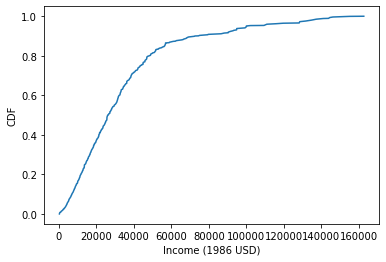

In [18]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

---

## Comparing distributions
So far we've seen two ways to represent distributions, PMFs and CDFs. In this lesson, we'll use PMFs and CDFs to compare distributions, and we'll see the pros and cons of each.

### Multiple PMFs
One way to compare distributions is to plot multiple PMFs on the same axes. For example, suppose we want to compare the distribution of age for male and female respondents. 

First I'll create a boolean Series that's true for male respondents. And I'll extract the age column. Now I can select ages for the male and female respondents. And plot a Pmf for each.

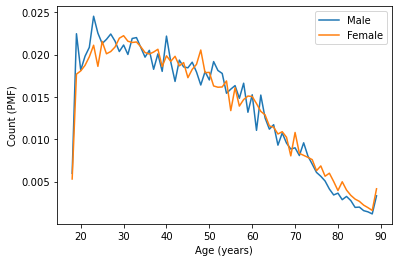

In [35]:
male = gss['sex'] == 1
age = gss['age']

male_age = age[male]
female_age = age[~male]

Pmf.from_seq(male_age).plot(label='Male')
Pmf.from_seq(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('Count (PMF)')
plt.legend()
plt.show()

Here's the result. It looks like there are more men in their twenties, maybe. And there are more women in their 70s and 80s. In between, the plot is pretty noisy; most of these differences are just random variations.

We can do the same thing with CDFs. Here's the code: everything is the same except I replaced Pmf with Cdf.

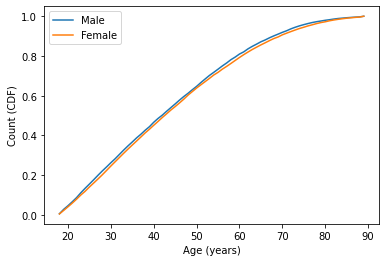

In [36]:
Cdf.from_seq(male_age).plot(label='Male')
Cdf.from_seq(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('Count (CDF)')
plt.legend()
plt.show()

And here is the result. In general, CDFs are smoother than PMFs. Because they smooth out randomness, we can often get a better view of real differences between distributions. In this case, the lines overlap over the whole range; that is, the distributions are nearly identical. But we can see the blue line to the left of the orange line across the distribution, which shows that men are younger at every percentile. Or, another way to think of it: for every age, the fraction of men below that age is more than the fraction of women below that age. But not by very much.

### Income distribution
As another example, let's look at household income and compare the distribution before and after 1995 (1995 is chosen because it's roughly the midpoint of the survey). 

###  Income PMFs
The variable realinc represents household income in 1986 dollars. I'll make a boolean Series to select respondents interviewed before 1995. Now I can plot the PMFs. And label the axes.

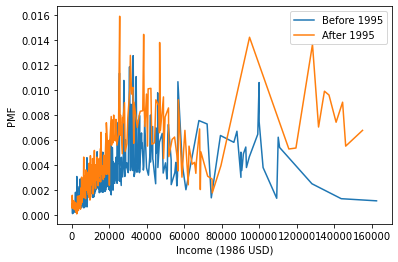

In [37]:
income = gss['realinc']
pre95 = gss['year'] < 1995

Pmf.from_seq(income[pre95]).plot(label='Before 1995')
Pmf.from_seq(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

Here's what it looks like. There are a lot of unique values in this distribution, and none of them appear very often. The PMF is so noisy, we can't really see the shape of the distribution. It looks like there are more people with high incomes after 1995, but it's hard to tell. We can get a clearer picture with a CDF.

### Income CDFs
Here's the code to generate the CDFs.

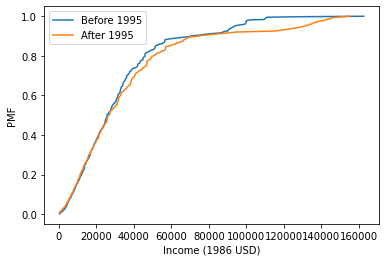

In [38]:
Cdf.from_seq(income[pre95]).plot(label='Before 1995')
Cdf.from_seq(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

And here are the results. Below $30,000 the CDFs are almost identical; above that, we can see that the orange distribution is shifted to the right. In other words, the fraction of people with high incomes is about the same, but the income of high earners has increased.

In general, for exploratory analysis CDFs is recommended. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two.

## Distribution of education
Let's begin comparing incomes for different levels of education in the `gss` dataset. The variable `educ` represents the respondent's years of education.

- Q. What fraction of respondents report that they have 12 years of education or fewer?

In [23]:
years = gss['educ']

Cdf.from_seq(years)[12]

0.5322611710323575

1. ~Approximately 22%~
2. ~Approximately 31%~
3. ~Approximately 47%~
4. **Approximately 53%**

## Extract education levels
Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

- Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
- Complete the line that identifies respondents with 12 or fewer years of education.
- Confirm that the mean of `high` is the fraction we computed in the previous exercise, about 53%.

In [24]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


## Plot income CDFs
Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:
```python
Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')
```
You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: `high`, `assc`, and `bach`.
- Plot the CDFs.

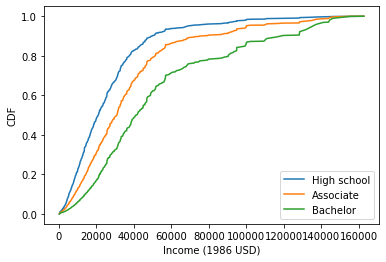

In [27]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

*It might not be surprising that people with more education have higher incomes, but looking at these distributions, we can see where the differences are.*

---

## Modeling distributions
In the previous lesson we used PMFs and CDFs to plot and compare distributions. We saw that PMFs don't work very well when the data have a large number of unique values. In this lesson you'll learn about probability density functions, or PDFs, and learn how to estimate PDFs from data.

### The normal distribution
Let's start with the normal distribution, also called the Gaussian distribution. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. To get a sense of what the normal distribution looks like, I'll use the NumPy random module to generate 1000 random values from a normal distribution. And plot their CDF. 

<AxesSubplot:>

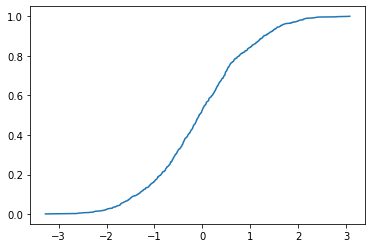

In [28]:
import numpy as np
sample = np.random.normal(size=1000)
Cdf.from_seq(sample).plot()

This sigmoid shape is what we expect to see with values from a normal distribution.

### The normal CDF
SciPy provides an object called norm that represents the normal distribution. I'll use `np.linspace()` to create an array of equally-spaced points from -3 to 3. `norm(0, 1)` creates an object that represents a normal distribution with mean 0 and standard deviation 1. `.cdf()` evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.


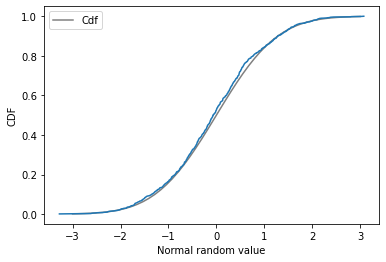

In [34]:
from scipy.stats import norm

xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)

plt.plot(xs, ys, color='gray', label='Cdf')

Cdf.from_seq(sample).plot()

plt.xlabel('Normal random value')
plt.ylabel('CDF')
plt.legend()
plt.show()

### Comparing CDFs
Here's the result. The CDF from the sample is pretty close to the normal CDF over the whole range. If this were real data, we would conclude that the normal distribution is a good model for the data.

### The bell curve
The norm object also provides `.pdf()`, which evaluates the probability density function, or PDF. And here's what that looks like. 

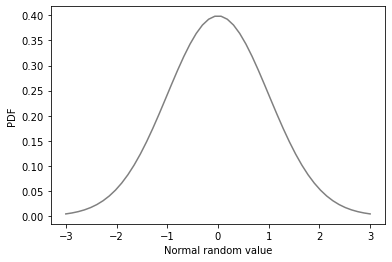

In [41]:
xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)
plt.plot(xs, ys, color='gray')
plt.xlabel('Normal random value')
plt.ylabel('PDF')
plt.show()

It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

### Sample PMF
Here's what it looks like. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

### KDE plot
To generate a KDE plot, we'll use the Seaborn library for data visualization, which I import as `sns`. Seaborn provides kdeplot, which takes the sample, estimates the PDF, and plots it. Here's what it looks like.


<AxesSubplot:ylabel='Density'>

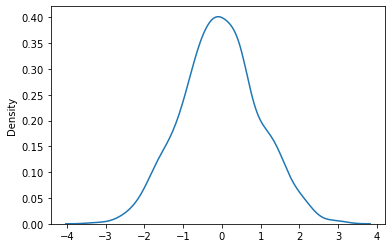

In [42]:
import seaborn as sns
sns.kdeplot(sample)

### KDE and PDF
Now we can compare the KDE plot and the normal PDF. Here's the code. There's nothing there we haven't already seen. And here's the result.

<AxesSubplot:ylabel='Density'>

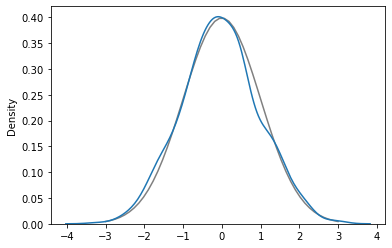

In [45]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

### PMF, CDF, KDE
To summarize, we've seen three ways to visualize distributions, PMFs, CDFs, and KDE. 

In general, I **use CDFs** when I am **exploring data**. I think they give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. If I am presenting results to an audience unfamiliar with CDFs, I'll **use PMFs** for **distributions with a small number of unique values** and **KDE if there are a lot of values**.

## Distribution of income
In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's `np.log10()` function.

Then, you'll use the computed mean and standard deviation to make a `norm` object using the [`scipy.stats.norm()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function.

- Extract `'realinc'` from `gss` and compute its logarithm using `np.log10()`.
- Compute the mean and standard deviation of the result.
- Make a `norm` object by passing the computed mean and standard deviation to `norm()`.

In [48]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


*Now we can plot the model and the observed distribution and see where they differ.*

## Comparing CDFs
To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:
```python
# Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)
```
`dist` is a `scipy.stats.norm` object with the same mean and standard deviation as the data. It provides `.cdf()`, which evaluates the normal cumulative distribution function.

Be careful with capitalization: `Cdf()`, with an uppercase `C`, creates `Cdf` objects. `dist.cdf()`, with a lowercase `c`, evaluates the normal cumulative distribution function.

- Evaluate the normal cumulative distribution function using `dist.cdf`.
- Use the `Cdf()` function to compute the CDF of `log_income`.
- Plot the result.

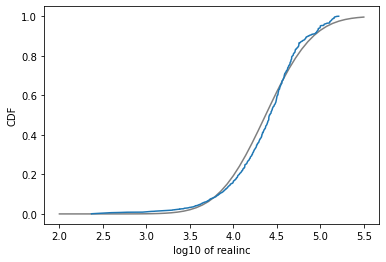

In [49]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

*The lognormal model is a pretty good fit for the data, but clearly not a perfect match. That's what real data is like; sometimes it doesn't fit the model.*

## Comparing PDFs
In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the `norm` object `dist` is available in your workspace:
```python
from scipy.stats import norm
dist = norm(mean, std)
```
Just as all `norm` objects have a `.cdf()` method, they also have a `.pdf()` method.

To create a KDE plot, you can use Seaborn's [`kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function.

- Evaluate the normal PDF using `dist`, which is a `norm` object with the same mean and standard deviation as the data.
- Make a KDE plot of the logarithms of the incomes, using `log_income`, which is a Series object.

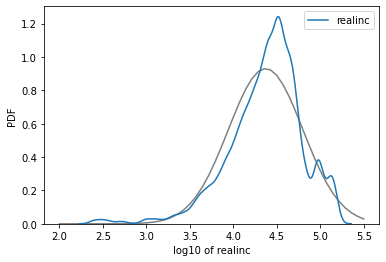

In [51]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income, label='realinc')

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.legend()
plt.show()